In [13]:
import pandas as pd


In [14]:
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('/content/235-Nov.csv')

In [16]:
df.head()

,owner-id,network-id,date,time,utc-offset,start-ime,end-time,detector-id,status,lane-id,...,small-class-count,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,month,day
0,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB EN,OK,1,...,0,0,0,OpenTMS-Detector46573-0,w,unknown,60,ON_RAMP,11,10
1,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB RL,OK,4,...,0,1,0,OpenTMS-Detector46573-1,w,unknown,60,NORMAL,11,10
2,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB RCL,OK,3,...,0,0,0,OpenTMS-Detector46573-2,w,unknown,60,NORMAL,11,10
3,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB LCL,OK,2,...,0,0,0,OpenTMS-Detector46573-3,w,unknown,60,NORMAL,11,10
4,Q-Free,Q-Free,20211110,80900,0,80800,80900,DMDS20-WB LL,OK,1,...,0,0,0,OpenTMS-Detector46573-4,w,unknown,60,NORMAL,11,10


In [17]:
print(df.head())

  owner-id network-id      date   time  utc-offset  start-ime  end-time  \
0   Q-Free     Q-Free  20211110  80900           0      80800     80900   
1   Q-Free     Q-Free  20211110  80900           0      80800     80900   
2   Q-Free     Q-Free  20211110  80900           0      80800     80900   
3   Q-Free     Q-Free  20211110  80900           0      80800     80900   
4   Q-Free     Q-Free  20211110  80900           0      80800     80900   

     detector-id status  lane-id  ...  small-class-count  medium-class-count  \
0   DMDS20-WB EN     OK        1  ...                  0                   0   
1   DMDS20-WB RL     OK        4  ...                  0                   1   
2  DMDS20-WB RCL     OK        3  ...                  0                   0   
3  DMDS20-WB LCL     OK        2  ...                  0                   0   
4   DMDS20-WB LL     OK        1  ...                  0                   0   

   large-class-count                device-id  link-direction  detec

In [18]:
print(df.describe())


               date           time  utc-offset      start-ime       end-time  \
count  1.287800e+05  128780.000000    128780.0  128780.000000  128780.000000   
mean   2.021111e+07  117912.004193         0.0  117932.395558  117912.004193   
std    3.440028e+00   69021.866649         0.0   69021.150108   69021.866649   
min    2.021110e+07       0.000000         0.0       0.000000       0.000000   
25%    2.021110e+07   60100.000000         0.0   60100.000000   60100.000000   
50%    2.021111e+07  120000.000000         0.0  120000.000000  120000.000000   
75%    2.021111e+07  175700.000000         0.0  175800.000000  175700.000000   
max    2.021111e+07  235900.000000         0.0  235900.000000  235900.000000   

             lane-id     lane-count  lane-occupancy     lane-speed  \
count  128780.000000  128780.000000   128780.000000  128780.000000   
mean        2.200000       9.634074        3.797197      61.164964   
std         1.166195       8.714397        4.332574       6.787330   

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128780 entries, 0 to 128779
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   owner-id            128780 non-null  object
 1   network-id          128780 non-null  object
 2   date                128780 non-null  int64 
 3   time                128780 non-null  int64 
 4   utc-offset          128780 non-null  int64 
 5   start-ime           128780 non-null  int64 
 6   end-time            128780 non-null  int64 
 7   detector-id         128780 non-null  object
 8   status              128780 non-null  object
 9   lane-id             128780 non-null  int64 
 10  lane-count          128780 non-null  int64 
 11  lane-occupancy      128780 non-null  int64 
 12  lane-speed          128780 non-null  int64 
 13  small-class-count   128780 non-null  int64 
 14  medium-class-count  128780 non-null  int64 
 15  large-class-count   128780 non-null  int64 
 16  de

In [20]:
# Convert 'time' from HHMMSS integer format to a string, then to hours
df['time'] = df['time'].apply(lambda x: str(x).zfill(6))  # Ensure the time has 6 digits (e.g., 80900 -> 080900)
df['time'] = df['time'].apply(lambda x: int(x[:2]) + int(x[2:4])/60 + int(x[4:])/3600)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [21]:
# Inspect the first few rows after the transformation
df.head()

,owner-id,network-id,date,time,utc-offset,start-ime,end-time,detector-id,status,lane-id,...,small-class-count,medium-class-count,large-class-count,device-id,link-direction,detector-type,sample-period,device-description,month,day
0,Q-Free,Q-Free,2021-11-10,8.15,0,80800,80900,DMDS20-WB EN,OK,1,...,0,0,0,OpenTMS-Detector46573-0,w,unknown,60,ON_RAMP,11,10
1,Q-Free,Q-Free,2021-11-10,8.15,0,80800,80900,DMDS20-WB RL,OK,4,...,0,1,0,OpenTMS-Detector46573-1,w,unknown,60,NORMAL,11,10
2,Q-Free,Q-Free,2021-11-10,8.15,0,80800,80900,DMDS20-WB RCL,OK,3,...,0,0,0,OpenTMS-Detector46573-2,w,unknown,60,NORMAL,11,10
3,Q-Free,Q-Free,2021-11-10,8.15,0,80800,80900,DMDS20-WB LCL,OK,2,...,0,0,0,OpenTMS-Detector46573-3,w,unknown,60,NORMAL,11,10
4,Q-Free,Q-Free,2021-11-10,8.15,0,80800,80900,DMDS20-WB LL,OK,1,...,0,0,0,OpenTMS-Detector46573-4,w,unknown,60,NORMAL,11,10


In [24]:
# Get unique dates in the DataFrame
unique_dates = df['date'].unique()

# Loop through each unique date and calculate the average lane occupancy
print("Average lane occupancy for each unique date:")
for date in unique_dates:
    # Filter the rows that belong to the current date
    date_data = df[df['date'] == date]

    # Calculate the average lane occupancy
    avg_occupancy = date_data['lane-occupancy'].mean()

    # Print the result for the current date
    print(f"Date: {date.date()}, Average Lane Occupancy: {avg_occupancy:.2f}")


Average lane occupancy for each unique date:
Date: 2021-11-10, Average Lane Occupancy: 4.48
Date: 2021-11-02, Average Lane Occupancy: 4.23
Date: 2021-11-08, Average Lane Occupancy: 4.29
Date: 2021-11-11, Average Lane Occupancy: 2.36
Date: 2021-11-03, Average Lane Occupancy: 1.81
Date: 2021-11-09, Average Lane Occupancy: 1.97


In [28]:
# Ensure proper rendering in Colab
%matplotlib inline


In [29]:
# Check for missing or invalid values in the 'status' column
print(df['status'].isnull().sum())  # Count missing values
print(df['status'].unique())  # Check for unique values


0
['OK' 'SENSOR_FAILURE']


In [34]:
# Check the actual count of each status
print(status_counts)


status
OK                128777
SENSOR_FAILURE         3
Name: count, dtype: int64


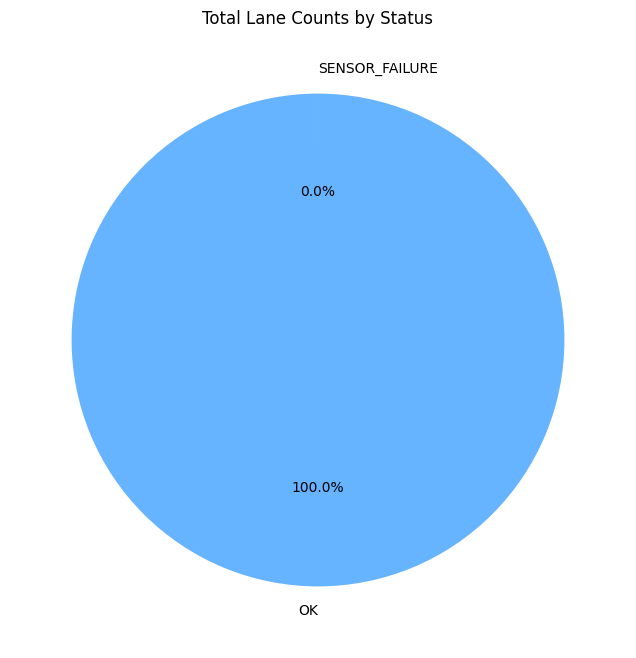

In [35]:
# Summarize the counts of each unique status
status_counts = df['status'].value_counts()

# Define colors for the chart (Optional: emphasize SENSOR_FAILURE)
colors = ['#66b3ff', '#ff6666']  # Light blue for 'OK', red for 'SENSOR_FAILURE'

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Total Lane Counts by Status')
plt.show()

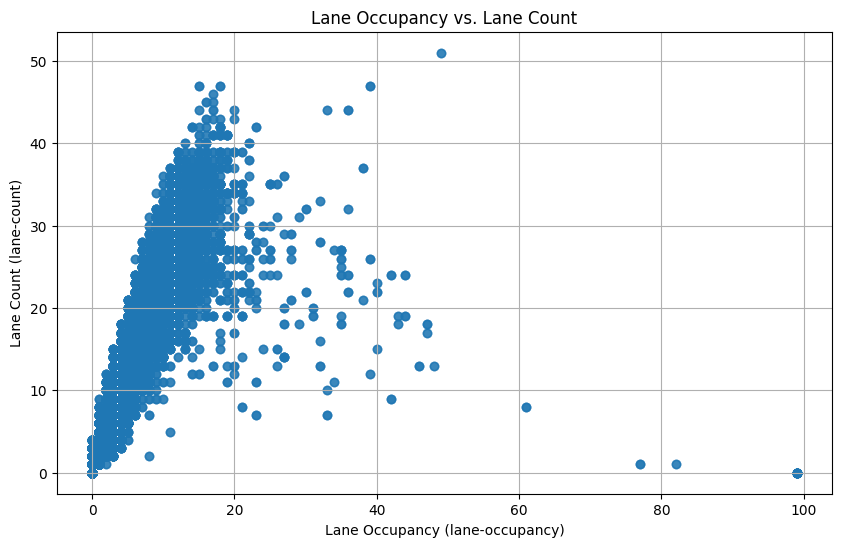

In [36]:
# Create scatter plot: lane occupancy vs  as lane count
plt.figure(figsize=(10, 6))
plt.scatter(df['lane-occupancy'], df['lane-count'], alpha=0.5)
plt.title('Lane Occupancy vs. Lane Count')
plt.xlabel('Lane Occupancy (lane-occupancy)')
plt.ylabel('Lane Count (lane-count)')
plt.grid(True)
plt.show()
